# Food Establishment Scores and Restaurant Reactions

Below we are going to analyze the relationship between restaurants and low inspection scores. Our research question is aimed at understanding whether the restaurants with low inspection scores improve their scores after receiving a follow up inspection or go out of business.

In [1]:
import pandas as pd
import numpy as np 
import time
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('//Users//audreydahlkemper//Downloads//Food_Establishment_Inspection_Scores.csv')
df.head(10)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,Super 8 Motel,78753.0,08/24/2020,98,"8128 N IH\nAUSTIN, TX 78753",10002408,Routine Inspection
1,Two Spoons,78735.0,07/20/2022,100,"7212 W SH\nAUSTIN, TX 78735",11825080,Routine Inspection
2,BC - Starbucks Coffee #6397,78738.0,07/14/2020,94,"12400 W SH\nBEE CAVE, TX 78738",10261986,Routine Inspection
3,Pho Thai Son,78748.0,07/30/2021,81,"9500 S IH\nAUSTIN, TX 78748",10036105,Routine Inspection
4,Signature #9,78701.0,07/27/2021,94,"900 N IH\nAUSTIN, TX 78701",10769075,Routine Inspection
5,Angel's Ice House,78669.0,02/13/2020,95,"21815 W SH\nSPICEWOOD, TX 78669",2802178,Routine Inspection
6,Teapioca Lounge,78748.0,11/19/2021,84,"9600 S IH\nAUSTIN, TX 78748",10693969,Routine Inspection
7,BC - Kwik Chek #55,78738.0,04/14/2020,100,"14417 W SH\nBEE CAVE, TX 78738",10374866,Routine Inspection
8,Jet Stop,78741.0,03/04/2022,94,"2723 S IH\nAUSTIN, TX 78741",2803751,Routine Inspection
9,LW- HEB 714,78734.0,12/21/2020,90,"2000 S FM 620 RD\nLAKEWAY, TX 78734",11430825,Routine Inspection


The Food Establishment Scores data set tracks the inspection scores of restaurants in the Austin area from 2019 to 2022. Included variables are restaurant name, zip code, inspection date, score, address, facility id, and process description. 25,842 different examinations have been recorded. 

In [2]:
print(len(df))

25842


In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.describe()

,Zip Code,Score,Facility ID
count,25836.000000,25842.000000,2.584200e+04
mean,78725.877342,90.998762,9.519705e+06
std,31.672245,7.506946,3.673435e+06
min,78610.000000,44.000000,2.800006e+06
25%,78704.000000,87.000000,1.003990e+07
50%,78735.000000,92.000000,1.119944e+07
75%,78750.000000,97.000000,1.201969e+07
max,78759.000000,100.000000,1.239764e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25842 entries, 0 to 25841
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant Name      25842 non-null  object 
 1   Zip Code             25836 non-null  float64
 2   Inspection Date      25842 non-null  object 
 3   Score                25842 non-null  int64  
 4   Address              25842 non-null  object 
 5   Facility ID          25842 non-null  int64  
 6   Process Description  25842 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.4+ MB


In Texas, a food establishment inspection score can fall within the following ranges -  Excellent: 100 to 97, Good: 96 to 90, Satisfactory: 89 to 81, Poor: 80 to 71, Failing: 70 or below. A "low" inspection grade is anything below a 70. The standard procedure for a store that receives a score below 70 is an issuance of fines, a follow-up inspection, and in certain cases closure of the restaurant. If a follow-up inspection is ordered it is scheduled 3-10 days after the annual inspection in order to see if the owners made corrective actions.

In [6]:
df['Process Description'].value_counts()

Routine Inspection      25525
Follow-Up Inspection      317
Name: Process Description, dtype: int64

In [7]:
df['Score'].value_counts()

100    2710
96     1625
97     1549
95     1474
93     1469
94     1427
98     1412
90     1396
91     1362
92     1339
99     1241
89      962
88      923
87      823
86      781
85      714
84      620
83      553
82      498
80      413
81      385
79      291
78      270
77      249
76      215
70      193
75      185
74      161
73      149
71      127
72      117
66       28
63       21
67       16
62       16
61       16
69       15
64       13
65       13
60       12
59       10
68        9
58        9
56        7
54        5
57        5
50        4
55        3
52        2
51        2
44        1
47        1
53        1
Name: Score, dtype: int64

Over the past three years 402 establishments received a score below 70 but only 317 received a follow up inspection. This could allude to a potential 85 stores going out of business.

In [8]:
df['Low Score'] = df['Score'] <= 70
df['Low Score'].value_counts()

False    25440
True       402
Name: Low Score, dtype: int64

In [23]:
df['Follow Up'] = df['Process Description'] == 'Follow-Up Inspection'
df['Follow Up'].value_counts()

False    1591
True      212
Name: Follow Up, dtype: int64

In [24]:
print(df.value_counts(subset=['Follow Up', 'Low Score']).sort_index())

Follow Up  Low Score
False      False        1211
           True          380
True       False         190
           True           22
dtype: int64


An analysis of the overlap between values with follow up inspections and low scores. 

In [25]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

A conversion of the date time value from a string to an integer. 

In [31]:
df.sort_values(by=['Score'], na_position='first').head(10)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
2369,Mom's Taste,78752.0,2022-06-23,44,"6613 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33096...",10000448,Routine Inspection,True,False
3851,China Family,78752.0,2022-09-08,47,"6801 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33397...",12125306,Routine Inspection,True,False
5016,Hot Pot Alley,78729.0,2021-07-13,50,"13201 N FM 620 RD\nAUSTIN, TX 78729\n(30.46741...",10174832,Routine Inspection,True,False
7004,Hunan Ranch,78717.0,2020-11-17,50,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Routine Inspection,True,False
22198,Hanabi Japanese Cuisine,78759.0,2021-01-27,50,"9503 RESEARCH BLVD\nAUSTIN, TX 78759\n(30.3866...",11402075,Routine Inspection,True,False
4864,Abby's Crab Shack,78748.0,2022-06-13,50,"9900 S IH\nAUSTIN, TX 78748",12393731,Routine Inspection,True,False
22890,Hideaway Kitchen & Bar,78744.0,2022-05-17,51,"4323 S IH\nAUSTIN, TX 78744",11903200,Routine Inspection,True,False
16705,Casa Vallarta Restaurant,78744.0,2022-04-27,51,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Routine Inspection,True,False
7110,Dr. Wok,78729.0,2021-01-19,52,"13201 POND SPRINGS RD\nAUSTIN, TX 78729\n(30.4...",10871550,Routine Inspection,True,False
8784,Thai Cuisine,78727.0,2021-07-12,52,"4101 W PARMER LN\nAUSTIN, TX 78727\n(30.42599,...",10194799,Routine Inspection,True,False


A visualization of the ten restaurants with the lowest scores. 

In [27]:
df[df['Restaurant Name']=="Mom's Taste"].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
2369,Mom's Taste,78752.0,2022-06-23,44,"6613 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33096...",10000448,Routine Inspection,True,False
9130,Mom's Taste,78752.0,2021-08-23,80,"6613 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33096...",10000448,Routine Inspection,False,False
19242,Mom's Taste,78752.0,2020-11-19,79,"6613 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33096...",10000448,Routine Inspection,False,False
24505,Mom's Taste,78752.0,2020-03-03,88,"6613 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33096...",10000448,Routine Inspection,False,False


In [28]:
df[df['Restaurant Name']=="China Family"].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
12986,China Family,78752.0,2022-09-26,91,"6801 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33397...",12125306,Follow-Up Inspection,False,True
3851,China Family,78752.0,2022-09-08,47,"6801 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33397...",12125306,Routine Inspection,True,False
22893,China Family,78752.0,2022-05-10,70,"6801 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33397...",12125306,Routine Inspection,True,False
5466,China Family,78752.0,2021-08-30,73,"6801 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33397...",12125306,Routine Inspection,False,False
19734,China Family,78752.0,2021-03-01,91,"6801 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33397...",12125306,Follow-Up Inspection,False,True
19362,China Family,78752.0,2021-02-09,65,"6801 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33397...",12125306,Routine Inspection,True,False
12499,China Family,78752.0,2020-03-04,85,"6801 AIRPORT BLVD\nAUSTIN, TX 78752\n(30.33397...",12125306,Routine Inspection,False,False


In [29]:
df[df['Restaurant Name']=="Abby's Crab Shack"].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
566,Abby's Crab Shack,78748.0,2022-06-30,82,"9900 S IH\nAUSTIN, TX 78748",12393731,Follow-Up Inspection,False,True
4864,Abby's Crab Shack,78748.0,2022-06-13,50,"9900 S IH\nAUSTIN, TX 78748",12393731,Routine Inspection,True,False
15898,Abby's Crab Shack,78748.0,2021-11-03,78,"9900 S IH\nAUSTIN, TX 78748",12393731,Routine Inspection,False,False


In [30]:
df[df['Restaurant Name']=='Hanabi Japanese Cuisine'].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
4014,Hanabi Japanese Cuisine,78759.0,2021-02-12,77,"9503 RESEARCH BLVD\nAUSTIN, TX 78759\n(30.3866...",11402075,Follow-Up Inspection,False,True
22198,Hanabi Japanese Cuisine,78759.0,2021-01-27,50,"9503 RESEARCH BLVD\nAUSTIN, TX 78759\n(30.3866...",11402075,Routine Inspection,True,False
21998,Hanabi Japanese Cuisine,78759.0,2020-06-24,85,"9503 RESEARCH BLVD\nAUSTIN, TX 78759\n(30.3866...",11402075,Routine Inspection,False,False
4333,Hanabi Japanese Cuisine,78759.0,2020-01-15,78,"9503 RESEARCH BLVD\nAUSTIN, TX 78759\n(30.3866...",11402075,Routine Inspection,False,False


In [32]:
df[df['Restaurant Name']=='Hunan Ranch'].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
1855,Hunan Ranch,78717.0,2022-03-15,85,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Follow-Up Inspection,False,True
8289,Hunan Ranch,78717.0,2022-02-28,100,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Routine Inspection,False,False
15537,Hunan Ranch,78717.0,2022-02-28,56,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Routine Inspection,True,False
23965,Hunan Ranch,78717.0,2021-09-07,73,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Routine Inspection,False,False
3351,Hunan Ranch,78717.0,2020-12-07,80,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Follow-Up Inspection,False,True
7004,Hunan Ranch,78717.0,2020-11-17,50,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Routine Inspection,True,False
13859,Hunan Ranch,78717.0,2020-06-19,74,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Routine Inspection,False,False
19384,Hunan Ranch,78717.0,2019-12-04,81,"14900 AVERY RANCH BLVD\nAUSTIN, TX 78717\n(30....",12122077,Routine Inspection,False,False


In [33]:
df[df['Restaurant Name']=='Hot Pot Alley'].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
18865,Hot Pot Alley,78729.0,2022-05-23,70,"13201 N FM 620 RD\nAUSTIN, TX 78729\n(30.46741...",10174832,Routine Inspection,True,False
24206,Hot Pot Alley,78729.0,2021-07-29,81,"13201 N FM 620 RD\nAUSTIN, TX 78729\n(30.46741...",10174832,Follow-Up Inspection,False,True
5016,Hot Pot Alley,78729.0,2021-07-13,50,"13201 N FM 620 RD\nAUSTIN, TX 78729\n(30.46741...",10174832,Routine Inspection,True,False
11995,Hot Pot Alley,78729.0,2020-09-16,82,"13201 N FM 620 RD\nAUSTIN, TX 78729\n(30.46741...",10174832,Routine Inspection,False,False
20550,Hot Pot Alley,78729.0,2020-05-05,76,"13201 N FM 620 RD\nAUSTIN, TX 78729\n(30.46741...",10174832,Routine Inspection,False,False
25677,Hot Pot Alley,78729.0,2019-12-05,90,"13201 N FM 620 RD\nAUSTIN, TX 78729\n(30.46741...",10174832,Routine Inspection,False,False


In [34]:
df[df['Restaurant Name']=='Casa Vallarta Restaurant'].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
9836,Casa Vallarta Restaurant,78744.0,2022-10-04,82,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Follow-Up Inspection,False,True
4542,Casa Vallarta Restaurant,78744.0,2022-09-15,59,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Routine Inspection,True,False
23519,Casa Vallarta Restaurant,78744.0,2022-06-02,74,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Follow-Up Inspection,False,True
16705,Casa Vallarta Restaurant,78744.0,2022-04-27,51,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Routine Inspection,True,False
8108,Casa Vallarta Restaurant,78744.0,2021-10-05,83,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Routine Inspection,False,False
2795,Casa Vallarta Restaurant,78744.0,2021-06-01,76,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Routine Inspection,False,False
6405,Casa Vallarta Restaurant,78744.0,2020-12-22,72,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Routine Inspection,False,False
24607,Casa Vallarta Restaurant,78744.0,2020-05-07,79,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Follow-Up Inspection,False,True
8871,Casa Vallarta Restaurant,78744.0,2020-04-14,62,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Routine Inspection,True,False
14183,Casa Vallarta Restaurant,78744.0,2019-12-06,72,"6002 BURLESON RD\nAUSTIN, TX 78744\n(30.20644,...",11241808,Follow-Up Inspection,False,True


In [35]:
df[df['Restaurant Name']=='Hideaway Kitchen & Bar'].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
16046,Hideaway Kitchen & Bar,78744.0,2022-06-13,78,"4323 S IH\nAUSTIN, TX 78744",11903200,Follow-Up Inspection,False,True
22890,Hideaway Kitchen & Bar,78744.0,2022-05-17,51,"4323 S IH\nAUSTIN, TX 78744",11903200,Routine Inspection,True,False
21717,Hideaway Kitchen & Bar,78744.0,2021-09-21,79,"4323 S IH\nAUSTIN, TX 78744",11903200,Routine Inspection,False,False
1081,Hideaway Kitchen & Bar,78744.0,2021-03-23,80,"4323 S IH\nAUSTIN, TX 78744",11903200,Routine Inspection,False,False
6610,Hideaway Kitchen & Bar,78744.0,2020-06-15,86,"4323 S IH\nAUSTIN, TX 78744",11903200,Routine Inspection,False,False
11739,Hideaway Kitchen & Bar,78744.0,2019-12-13,90,"4323 S IH\nAUSTIN, TX 78744",11903200,Routine Inspection,False,False


In [36]:
df[df['Restaurant Name']=='Thai Cuisine'].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
19145,Thai Cuisine,78727.0,2021-12-13,71,"4101 W PARMER LN\nAUSTIN, TX 78727\n(30.42599,...",10194799,Routine Inspection,False,False
15747,Thai Cuisine,78727.0,2021-07-27,73,"4101 W PARMER LN\nAUSTIN, TX 78727\n(30.42599,...",10194799,Follow-Up Inspection,False,True
8784,Thai Cuisine,78727.0,2021-07-12,52,"4101 W PARMER LN\nAUSTIN, TX 78727\n(30.42599,...",10194799,Routine Inspection,True,False
364,Thai Cuisine,78727.0,2020-08-12,74,"4101 W PARMER LN\nAUSTIN, TX 78727\n(30.42599,...",10194799,Routine Inspection,False,False
21069,Thai Cuisine,78727.0,2020-04-14,93,"4101 W PARMER LN\nAUSTIN, TX 78727\n(30.42599,...",10194799,Routine Inspection,False,False


In [37]:
df[df['Restaurant Name']=='Dr. Wok'].sort_values(by=['Inspection Date'], ascending=False)

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
7110,Dr. Wok,78729.0,2021-01-19,52,"13201 POND SPRINGS RD\nAUSTIN, TX 78729\n(30.4...",10871550,Routine Inspection,True,False
17337,Dr. Wok,78729.0,2020-08-11,80,"13201 POND SPRINGS RD\nAUSTIN, TX 78729\n(30.4...",10871550,Routine Inspection,False,False
22601,Dr. Wok,78729.0,2020-04-14,93,"13201 POND SPRINGS RD\nAUSTIN, TX 78729\n(30.4...",10871550,Routine Inspection,False,False


An analysis of the restaurants with the ten lowest scores exemplifies a correlation between a store receiving a low score and then a follow-up inspection. Out of the ten establishments, 2 received a low store and did not record a follow up inspection. Cross tabulating the dates of the two stores - Dr. Wok and Mom's Taste - it appears that given the date each store closed. The time period between routine inspections and follow up inspections is often a couple or days and at most a month. Dr. Wok and Mom's Taste recorded no follow up inspection within that range. The other restaurants who received a low score during a routine inspection increased the score during the follow up inspection.

# Creation of a New Data Frame

In [11]:
low_scoring_restaurants = df[df['Low Score']==True]['Restaurant Name'].values
low_scoring_restaurants

array(['Umi Sushi Bar & Grill', "TEJI's Indian Restaurant",
       'Taqueria Arandinas', 'Bar-B-Q-Inn', 'Tortilleria El Taquito',
       "Tyson's Tacos", 'Shanghai Chinese Restaurant',
       'MN - Taqueria Huentitan', "TEJI's Indian Restaurant",
       'Kim Phung Restaurant', 'Park on South Lamar, The',
       'Rolling Rooster, The', "Al's Food Mart", 'Ho Ho Chinese BBQ',
       'Bread Basket', 'Dong-Nai', '99 Ranch Market #107', 'Sushi Niichi',
       'Los Buhos', 'Brooklyn Heights Pizzeria', 'Eastside Tavern',
       'OOB - Sams Stonelake', 'Xian Sushi and Noodle', 'Sushi Junai 2',
       'Eurasia Sushi Bar & Seafood', 'Sabor Colombia',
       '7-Eleven Convenience Store #36563B', 'Chutney Indian Vegetarian',
       'EurAsia 3', 'Suprabhat', "SV-Nala's",
       'PF - Morelia Mexican Grill', "Valencia's Tex-Mex Garage",
       '7-Eleven Convenience Store #38104A', "Mom's Taste", 'Los Pinos',
       'Joy East Chinese Buffet', 'Ka Prow Restaurant',
       'Donut & Kolache Express', "DK

In [39]:
df = df[df['Restaurant Name'].isin(low_scoring_restaurants)].sort_values(['Restaurant Name', 'Inspection Date'])
df.head()

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description,Low Score,Follow Up
25119,290 Express,78736.0,2021-04-20,70,"9520 HWY\nW STE A AUSTIN, TX 78736",12393646,Routine Inspection,True,False
5265,290 Express,78736.0,2021-08-24,71,"9520 HWY\nW STE A AUSTIN, TX 78736",12393646,Routine Inspection,False,False
847,290 Express,78736.0,2021-12-22,89,"9520 HWY\nW STE A AUSTIN, TX 78736",12393646,Routine Inspection,False,False
11774,290 Express,78736.0,2022-04-21,90,"9520 HWY\nW STE A AUSTIN, TX 78736",12393646,Routine Inspection,False,False
16246,290 Express,78736.0,2022-08-22,87,"9520 HWY\nW STE A AUSTIN, TX 78736",12393646,Routine Inspection,False,False


Using the low score column, all of the restaurants that at some point in time received a low inspection score are filtered out and sorted by name and inspection date. This program does not account for duplicates. 

In [16]:
restaurant_names = []
zip_codes = []
addresses = []
first_inspection_dates = []
first_inspection_scores = []
followup_inspection_dates = []
followup_inspection_scores = []

indices = df.index.values

for i in range(len(indices)-1):
    df_index = indices[i]
    next_index = indices[i+1]
    if df.loc[df_index]['Low Score']and df.loc[next_index]['Process Description'] =='Follow-Up Inspection':
        restaurant_names.append(df.loc[df_index]['Restaurant Name'])
        zip_codes.append(df.loc[df_index]['Zip Code'])
        addresses.append(df.loc[df.index]['Address'])
        first_inspection_dates.append(df.loc[df_index]['Inspection Date'])
        first_inspection_scores.append(df.loc[df_index]['Score'])
        followup_inspection_dates.append(df.loc[next_index]['Inspection Date'])
        followup_inspection_scores.append(df.loc[next_index]['Score'])

In [18]:
df_final = pd.DataFrame({'Restaurant Name': restaurant_names,
                        'Zip Code': zip_codes,
                        'Addresses': addresses,
                        'First Inspection Date': first_inspection_dates,
                        'First Inspection Score': first_inspection_scores,
                        'Followup Inspection Date': followup_inspection_dates,
                        'Followup Inspection Score': followup_inspection_scores})
df_final.head()

,Restaurant Name,Zip Code,Addresses,First Inspection Date,First Inspection Score,Followup Inspection Date,Followup Inspection Score
0,7-Eleven Convenience Store #36589B,78729.0,25119 9520 HWY\nW STE A AUST...,07/28/2021,66,08/12/2021,76
1,7-Eleven Convenience Store #38104A,78752.0,25119 9520 HWY\nW STE A AUST...,03/18/2021,69,03/24/2021,91
2,888 Pan Asian Restaurant,78741.0,25119 9520 HWY\nW STE A AUST...,06/17/2022,60,07/07/2022,80
3,99 Ranch Market #107,78752.0,25119 9520 HWY\nW STE A AUST...,03/10/2022,63,03/31/2022,74
4,Abby's Crab Shack,78748.0,25119 9520 HWY\nW STE A AUST...,06/13/2022,50,06/30/2022,82


In order to analyze the difference in initial inspection scores and the follow up inspection scores a new data frame was created. The final data frame includes the varaibles restaurant name, zip code, addresses, first inspection date, first inspection score, followup inspection date, and followup inspection score. Each line was filtered first through the low score function and then the follow up inspection function. As after an establishment receives a grade below 70 they also receive a follow up inspection. The variable "first inspection date" refers to the annual inspection while the variable "follow up inspection date" refers to the first follow up inspection after the annual. 

# Charting the Inspection Score Data

In [ ]:
df_final = df

In [21]:
df_final['Difference'] = df_final['Followup Inspection Score'] - df_final['First Inspection Score']

In [42]:
dif = df_final['Difference']

The difference between the follow up inspection score and the first inspection score is calculated in order to analyze the change in time. 

Text(0.5, 1.0, 'Difference Between Intial and Follow Up Scores')

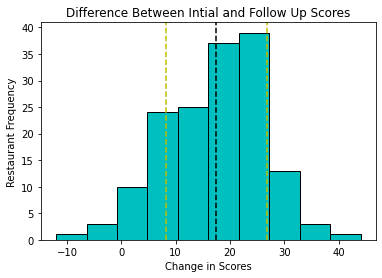

In [59]:
import statistics

plt.hist(dif, bins=10, color='c', edgecolor='k')
m = statistics.mean(dif)
sd = statistics.stdev(dif)

plt.axvline(m, color='k', linestyle='dashed')

plt.axvline(m + sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.xlabel('Change in Scores')
plt.ylabel('Restaurant Frequency')
plt.title('Difference Between Intial and Follow Up Scores')

In [53]:
mean = np.mean(dif)
print(f'Mean: {mean:.2f}')

median = np.median(dif)
print(f'Median: {median:.2f}')  

variance = np.var(dif)
print(f'Variance: {variance:.2f}') 

sd = np.std(dif)
print(f'Standard Deviation: {sd:.2f}')


Mean: 17.49
Median: 18.00
Variance: 84.84
Standard Deviation: 9.21


The histogram above displays a left-skewed unimodal distribution of the filtered restaurant inspection scores. On the histogram the mean is represented by the black dashed line. The mean is 17.49 which in regards to the data set is intepreted as an average increase of 17.39 points between the intial and follow up inspection. The variance is 84.84 and the standard deviation is 9.21. 

In [60]:
print(len(dif))

156
